In [1]:
from qiskit import QuantumCircuit,transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram

In [2]:
string='0101'
n=len(string)

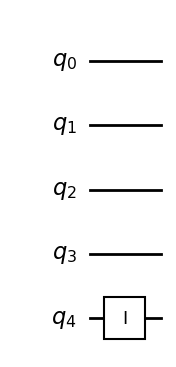

In [3]:
#if f(x) is constant and f(x)=0
constant_0=QuantumCircuit(n+1,name='constant_0')
constant_0.id(n)
constant_0.to_gate()

constant_0.draw(output='mpl',style='bw')

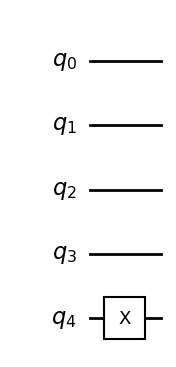

In [4]:
#if f(x) is constant and f(x)=1
constant_1=QuantumCircuit(n+1,name="constant_1")
constant_1.x(n)
constant_1.to_gate()

constant_1.draw(output='mpl',style='bw')

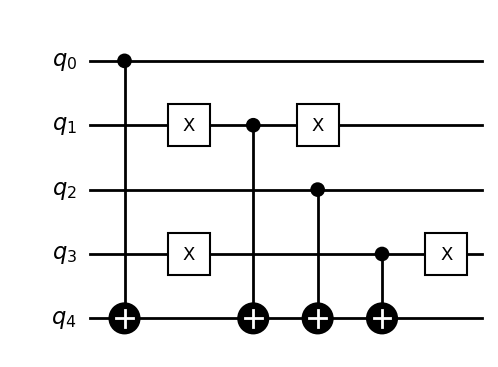

In [5]:
#if f(x) is balanced then first half of inputs f(x)=0 remaining f(x)=1
balanced=QuantumCircuit(n+1,name='balanced')
for i,v in enumerate(string):
    if v=='0':
        balanced.cx(i,n)
    else:
        balanced.x(i)
        balanced.cx(i,n)
        balanced.x(i)
balanced.to_gate()

balanced.draw(output='mpl',style='bw')

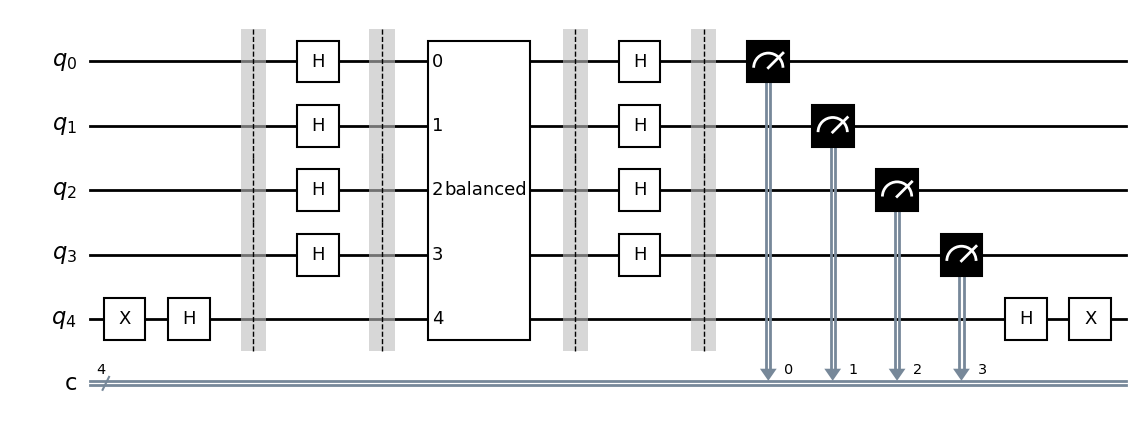

In [6]:
qc=QuantumCircuit(n+1,n)

#ancilia qubit
qc.x(n)
qc.h(n)
qc.barrier()
#hadmard transform
qc.h(range(n))
qc.barrier()
#apply oracle
qc.append(balanced,range(n+1))
qc.barrier()
#intereference
qc.h(range(n))
qc.barrier()

#measure
qc.measure(range(n),range(n))
qc.h(n)
qc.x(n)

qc.draw(output='mpl',style='bw')

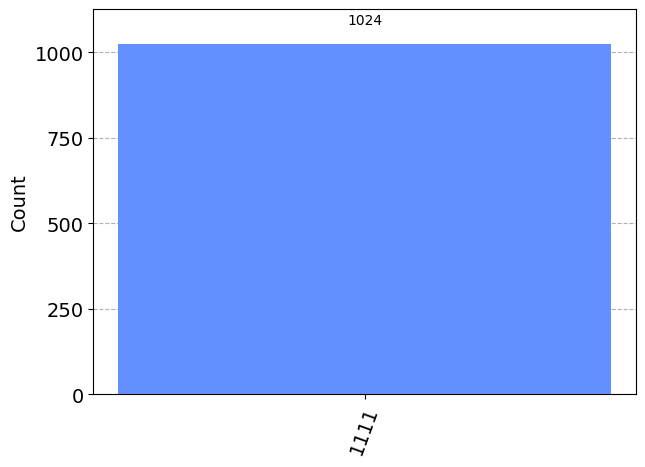

In [7]:
service=QiskitRuntimeService()
backend=service.get_backend('ibmq_qasm_simulator')
result=backend.run(transpile(qc,backend),shots=1024).result()
counts=result.get_counts(qc)
plot_histogram(counts)